In [1]:
#packages
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

In [2]:
df= pd.read_excel("Copper_Set.xlsx")

In [3]:
df=df[:500]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             499 non-null    object 
 1   item_date      500 non-null    float64
 2   quantity tons  500 non-null    object 
 3   customer       500 non-null    float64
 4   country        500 non-null    float64
 5   status         500 non-null    object 
 6   item type      500 non-null    object 
 7   application    500 non-null    float64
 8   thickness      500 non-null    float64
 9   width          500 non-null    float64
 10  material_ref   185 non-null    object 
 11  product_ref    500 non-null    int64  
 12  delivery date  500 non-null    float64
 13  selling_price  500 non-null    float64
dtypes: float64(8), int64(1), object(5)
memory usage: 54.8+ KB


In [5]:
#checking the null values in this dataframe
df.isnull().sum()

id                 1
item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
material_ref     315
product_ref        0
delivery date      0
selling_price      0
dtype: int64

In [6]:
#checking the unique values of the all columns

for i in df.columns:
  print(i,":",df[i].nunique())

id : 499
item_date : 2
quantity tons : 500
customer : 59
country : 13
status : 6
item type : 3
application : 14
thickness : 68
width : 134
material_ref : 126
product_ref : 11
delivery date : 11
selling_price : 317


In [7]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [8]:
#converting the datatypes
# item_dat, delivery date, quantity tons

df["quantity tons"]= pd.to_numeric(df["quantity tons"],errors="coerce")
df["item_date_1"]= pd.to_datetime(df["item_date"],format="%Y%m%d",errors="coerce").dt.date
df["delivery_date_1"]= pd.to_datetime(df["delivery date"],format="%Y%m%d",errors="coerce").dt.date

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               499 non-null    object 
 1   item_date        500 non-null    float64
 2   quantity tons    500 non-null    float64
 3   customer         500 non-null    float64
 4   country          500 non-null    float64
 5   status           500 non-null    object 
 6   item type        500 non-null    object 
 7   application      500 non-null    float64
 8   thickness        500 non-null    float64
 9   width            500 non-null    float64
 10  material_ref     185 non-null    object 
 11  product_ref      500 non-null    int64  
 12  delivery date    500 non-null    float64
 13  selling_price    500 non-null    float64
 14  item_date_1      499 non-null    object 
 15  delivery_date_1  499 non-null    object 
dtypes: float64(9), int64(1), object(6)
memory usage: 62.6+ KB


In [10]:
df.isnull().sum()

id                   1
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref       315
product_ref          0
delivery date        0
selling_price        0
item_date_1          1
delivery_date_1      1
dtype: int64

In [11]:
#removing the "00000" datas in the "material_ref" column
df["material_ref"]=df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)

In [12]:
df.isnull().sum()

id                   1
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref       351
product_ref          0
delivery date        0
selling_price        0
item_date_1          1
delivery_date_1      1
dtype: int64

In [13]:
# "material_ref" have a maximum null values (55%) so, we want to drop the column
# And id is a unique values so we want to drop the column

df.drop(columns=["id","material_ref"],inplace=True)

In [14]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        1
delivery_date_1    1
dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,500.0,2.020988e+07,1.164549e+04,1.995000e+07,2.021040e+07,2.021040e+07,2.021040e+07,2.021040e+07
quantity tons,500.0,8.800482e+01,1.869031e+02,6.286158e-01,1.368190e+01,3.999771e+01,6.910461e+01,2.908996e+03
customer,500.0,3.025565e+07,7.202992e+04,3.014814e+07,3.020859e+07,3.021844e+07,3.028338e+07,3.040719e+07
country,500.0,4.575800e+01,2.240391e+01,2.500000e+01,2.800000e+01,3.200000e+01,7.700000e+01,1.130000e+02
application,500.0,2.556200e+01,1.784890e+01,4.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,6.600000e+01
thickness,500.0,7.497450e+00,1.117251e+02,1.800000e-01,8.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,500.0,1.249868e+03,2.117014e+02,7.700000e+02,1.064000e+03,1.250000e+03,1.441000e+03,2.000000e+03
product_ref,500.0,7.320567e+08,8.170587e+08,6.119930e+05,6.119930e+05,1.641416e+08,1.668702e+09,1.693868e+09
delivery date,500.0,2.023094e+07,4.516570e+05,2.021010e+07,2.021070e+07,2.021070e+07,2.021080e+07,3.031010e+07
selling_price,500.0,1.126530e+03,2.177606e+02,-1.160000e+03,1.031000e+03,1.125500e+03,1.237500e+03,2.022000e+03


In [16]:
#quantity tons and selling_price have a negative values, This is impossible,
# so we need to replace the negative values

#converting the negative values into the null values
df["quantity tons"]= df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"]= df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [17]:
df.nunique()

item_date            2
quantity tons      500
customer            59
country             13
status               6
item type            3
application         14
thickness           68
width              134
product_ref         11
delivery date       11
selling_price      315
item_date_1          1
delivery_date_1     10
dtype: int64

In [18]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      2
item_date_1        1
delivery_date_1    1
dtype: int64

# Handling the null values using mean(),median() and mode()

In [19]:
# object columns and mode method
df["item_date_1"].fillna(df["item_date_1"].mode().iloc[0],inplace=True)
df["delivery_date_1"].fillna(df["delivery_date_1"].mode().iloc[0],inplace=True)
df["status"].fillna(df["status"].mode().iloc[0],inplace=True)
df["item_date"]. fillna(df["item_date"].mode().iloc[0],inplace=True)
df["delivery date"]. fillna(df["delivery date"].mode().iloc[0],inplace=True)


In [20]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      2
item_date_1        0
delivery_date_1    0
dtype: int64

In [21]:
#numarical column and median()
df["quantity tons"].fillna(df["quantity tons"].median(),inplace=True)
df["customer"].fillna(df["customer"].median(),inplace=True)
df["country"].fillna(df["country"].median(),inplace=True)
df["application"].fillna(df["application"].median(),inplace=True)
df["thickness"].fillna(df["thickness"].median(),inplace=True)
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)


In [22]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery_date_1    0
dtype: int64

# Encoding the catagorical columns

In [23]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [24]:
df["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful'], dtype=object)

In [25]:
df["status"]= df["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

In [26]:
df["status"].unique()

array([1, 2, 3, 0, 4, 5], dtype=int64)

In [27]:
df["item type"]= OrdinalEncoder().fit_transform(df[["item type"]])

In [28]:
df["item type"].unique()

array([1., 2., 0.])

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,500.0,2.020988e+07,1.164549e+04,1.995000e+07,2.021040e+07,2.021040e+07,2.021040e+07,2.021040e+07
quantity tons,500.0,8.800482e+01,1.869031e+02,6.286158e-01,1.368190e+01,3.999771e+01,6.910461e+01,2.908996e+03
customer,500.0,3.025565e+07,7.202992e+04,3.014814e+07,3.020859e+07,3.021844e+07,3.028338e+07,3.040719e+07
country,500.0,4.575800e+01,2.240391e+01,2.500000e+01,2.800000e+01,3.200000e+01,7.700000e+01,1.130000e+02
status,500.0,1.174000e+00,9.431347e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
item type,500.0,5.080000e-01,5.044253e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
application,500.0,2.556200e+01,1.784890e+01,4.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,6.600000e+01
thickness,500.0,7.497450e+00,1.117251e+02,1.800000e-01,8.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,500.0,1.249868e+03,2.117014e+02,7.700000e+02,1.064000e+03,1.250000e+03,1.441000e+03,2.000000e+03
product_ref,500.0,7.320567e+08,8.170587e+08,6.119930e+05,6.119930e+05,1.641416e+08,1.668702e+09,1.693868e+09


In [30]:
df.to_csv("Industrial_Copper_proper.csv",index= False)

# Handling the skewness using (Log Transfermation)

In [31]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column], color="skyblue")
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="orange")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)
  sns.boxplot(df, x=column,color="green")
  plt.title("Box plot for"+" "+column)

In [32]:
skewed_columns=['quantity tons', 'customer', 'country', 'status',
                'item type', 'application', 'thickness', 'width', 'product_ref',
                'selling_price']

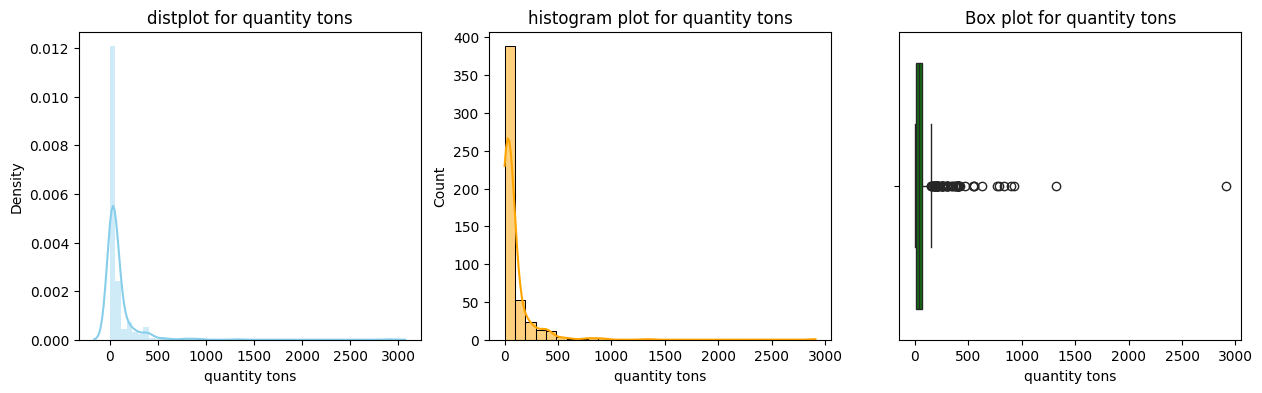

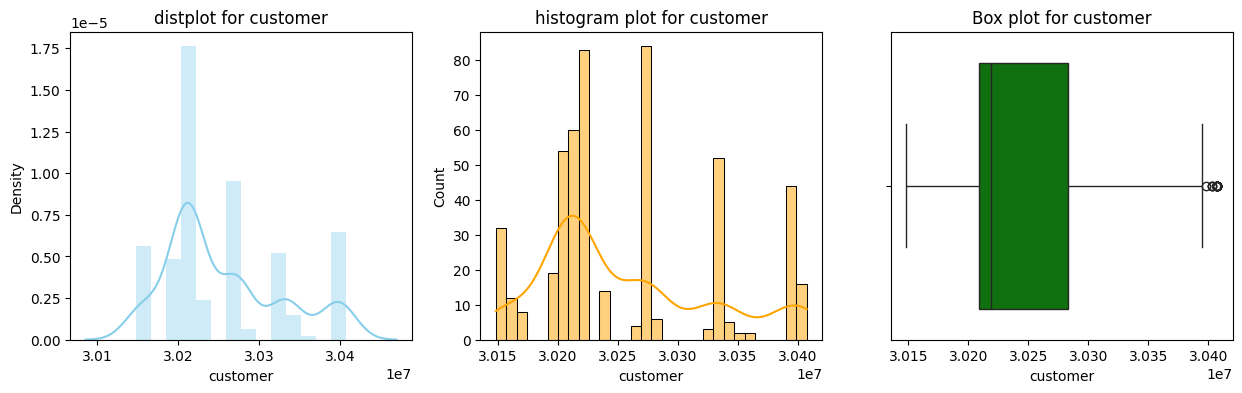

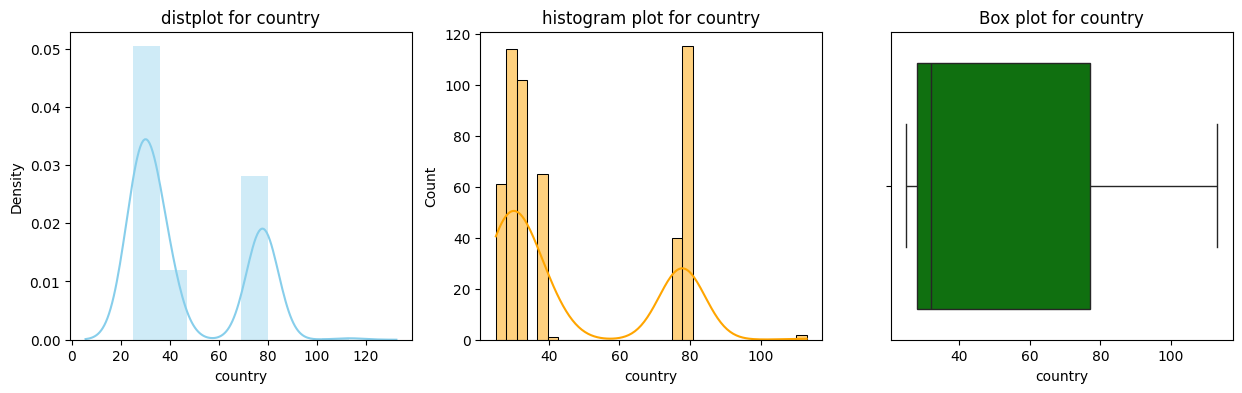

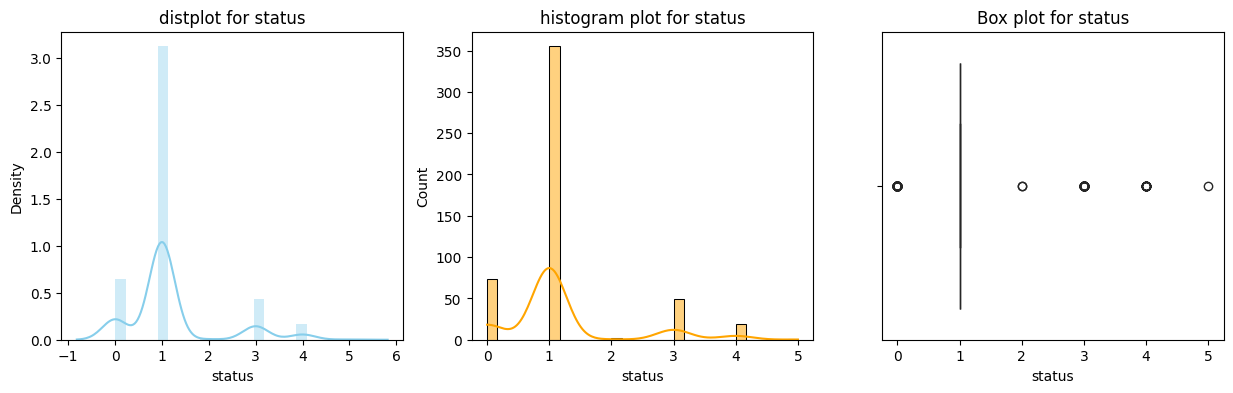

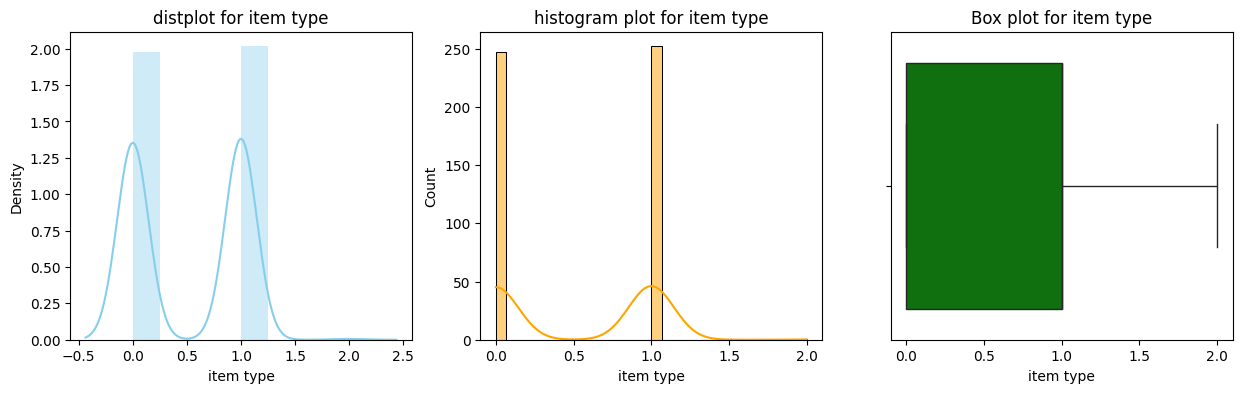

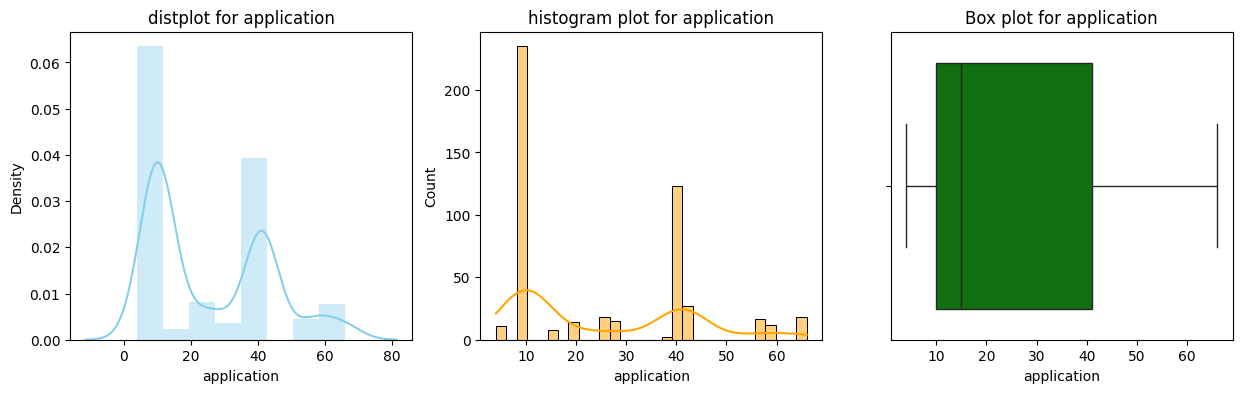

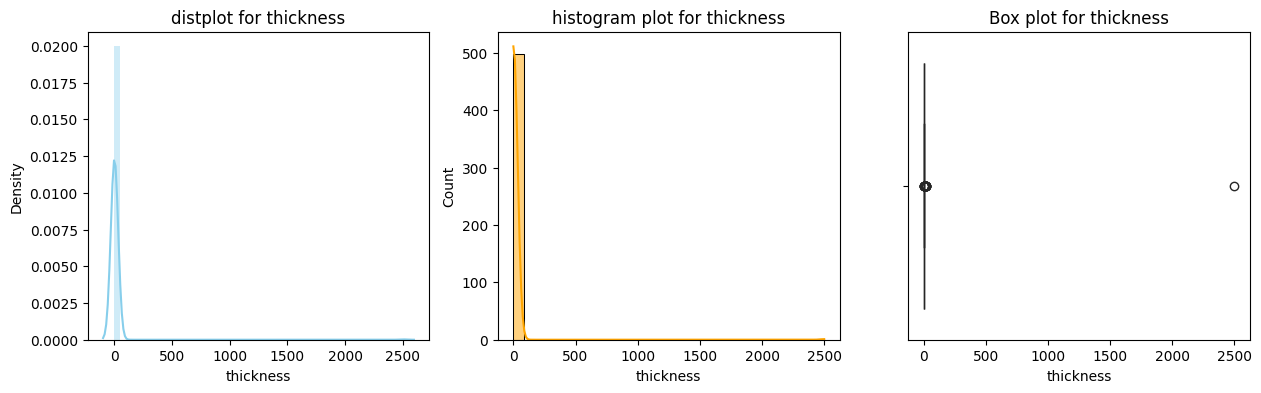

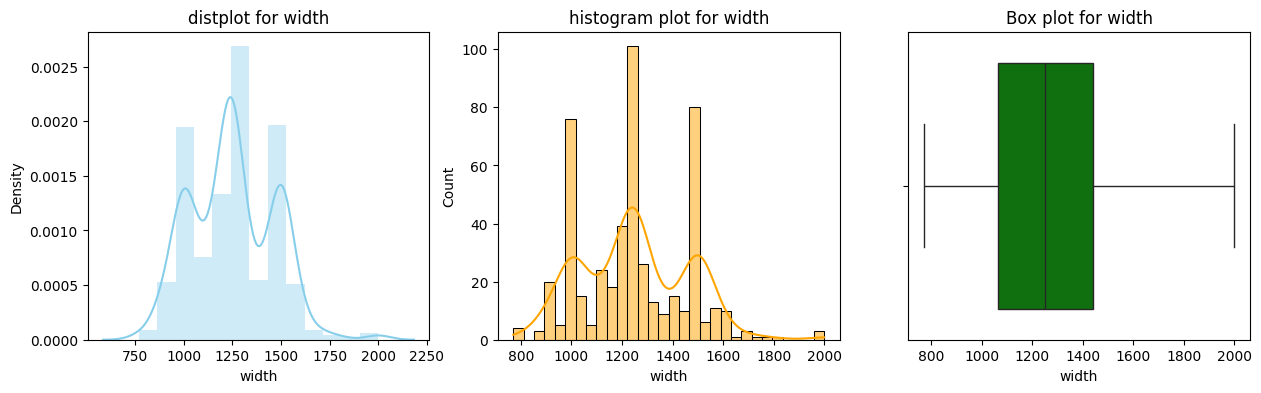

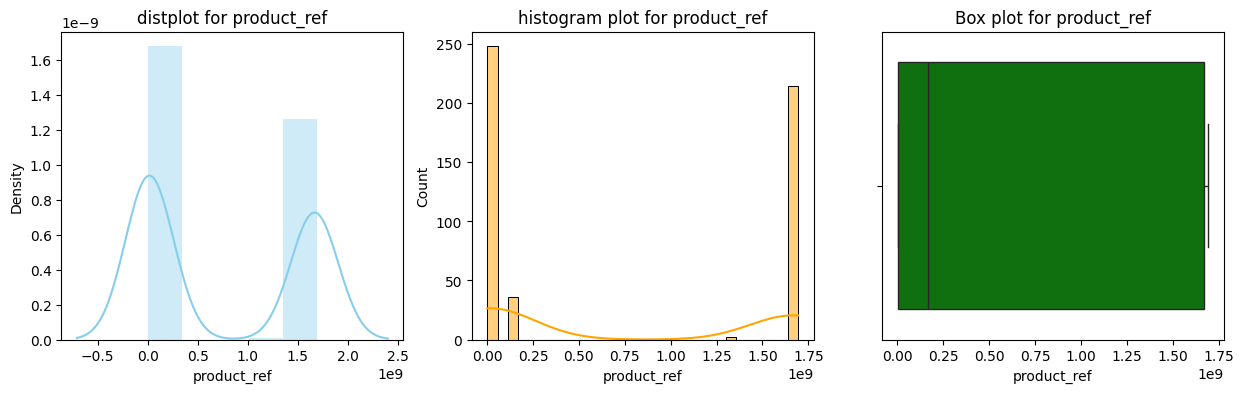

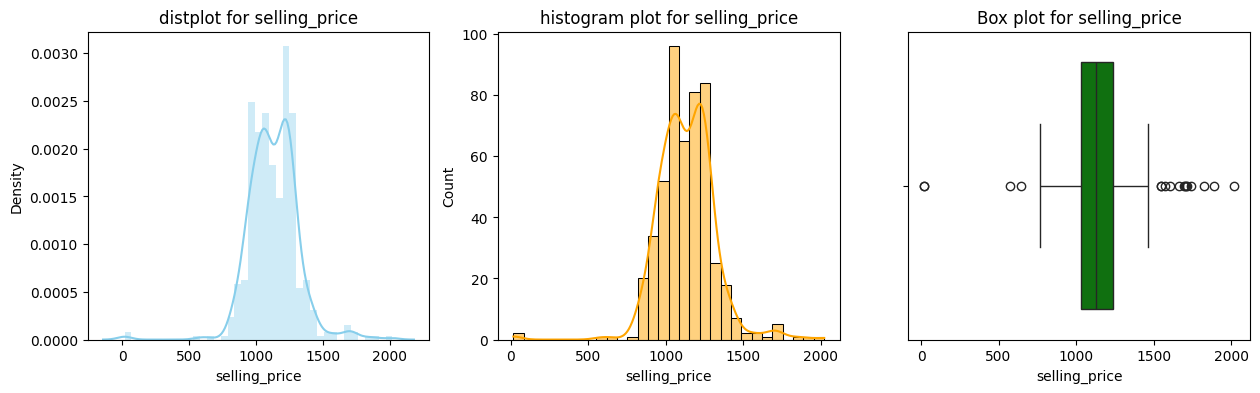

In [33]:
for i in skewed_columns:
  plot(df,i)

In [34]:
#Skewed columns:
# 1.quantity tons
# 2.customer
# 3.thickness
# 4.selling_price

In [35]:
df1= df.copy()

In [36]:
df1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1'],
      dtype='object')

In [37]:
df1["quantity_tons_log"]= np.log(df1["quantity tons"])
df1["customer_log"]= np.log(df1["customer"])
df1["thickness_log"]= np.log(df1["thickness"])
df1["selling_price_log"]= np.log(df1["selling_price"])

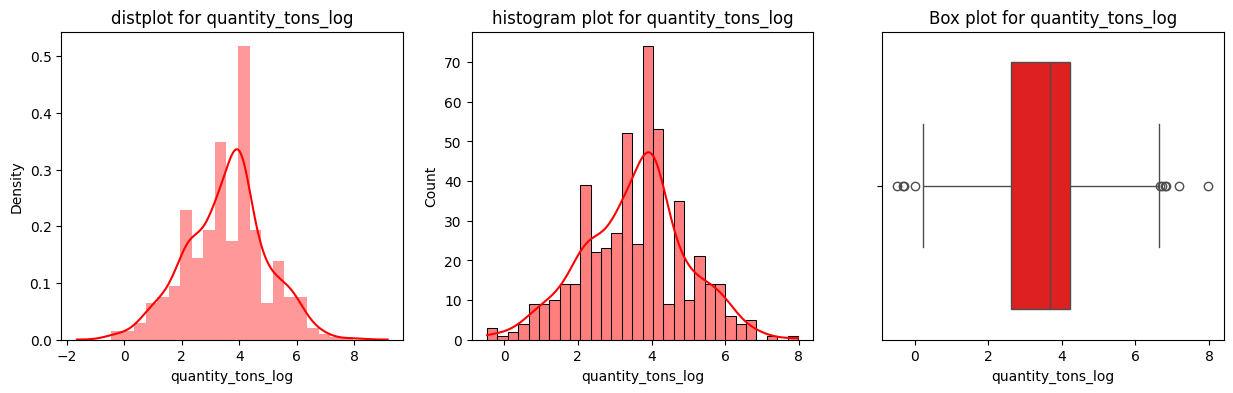

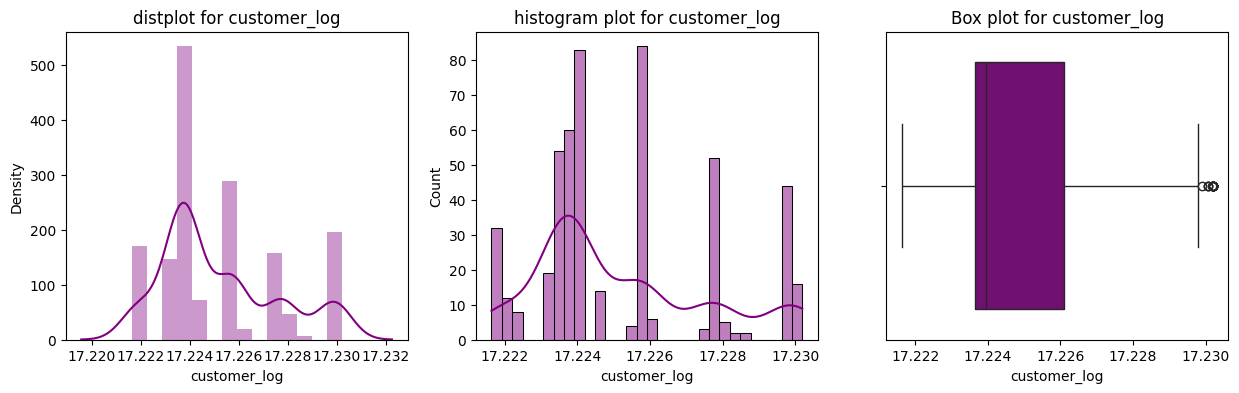

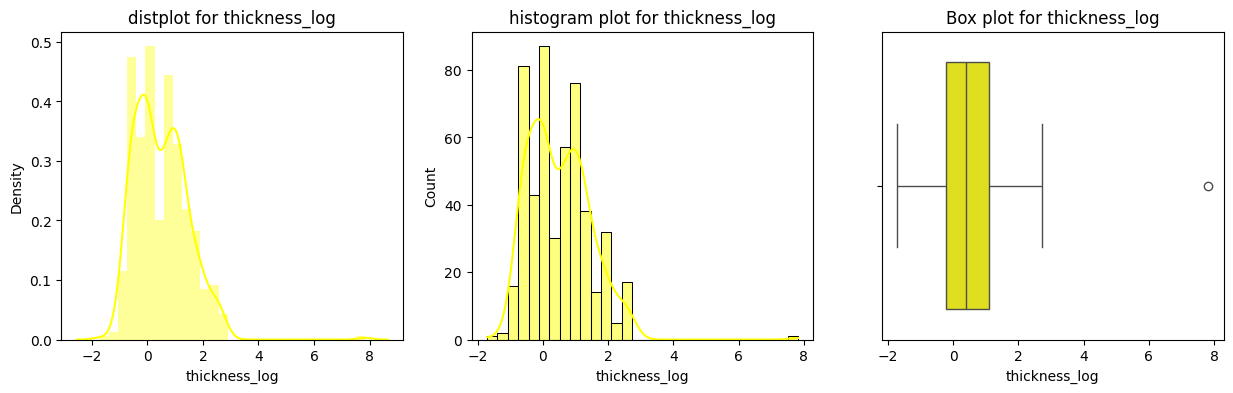

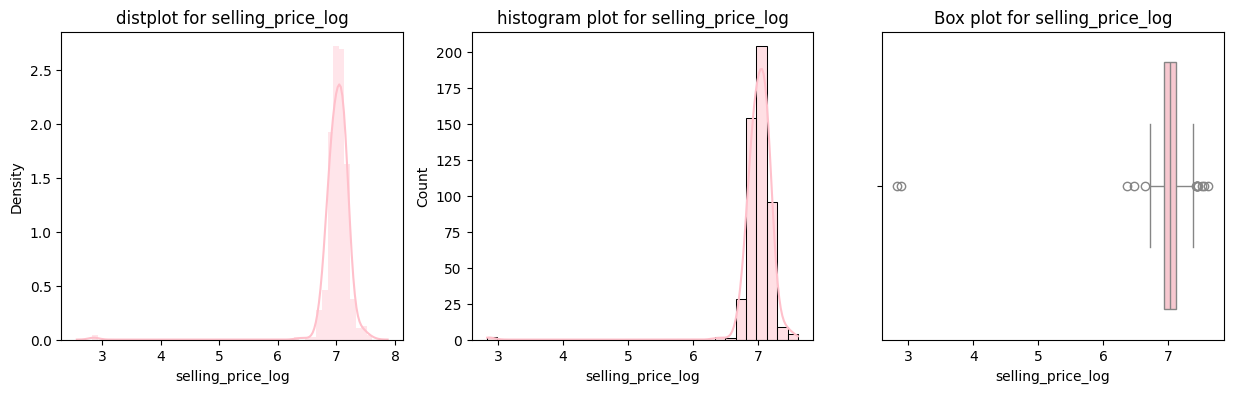

In [38]:
def plot(df, column, color):
    # distplot
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    sns.distplot(df[column], color=color)
    plt.title("distplot for" + " " + column)

    # histogram plot
    plt.subplot(1, 3, 2)
    sns.histplot(df, x=column, kde=True, bins=30, color=color)
    plt.title("histogram plot for" + " " + column)

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(df, x=column, color=color)
    plt.title("Box plot for" + " " + column)

# Define colors for each plot
colors = ["red", "purple", "yellow", "pink"]

# Example usage with different skewed columns
skewed_columns = ["quantity_tons_log", "customer_log", "thickness_log", "selling_price_log"]

# Ensure the number of columns matches the number of colors
if len(skewed_columns) == len(colors):
    for idx, col in enumerate(skewed_columns):
        plot(df1, col, color=colors[idx])

    plt.show()
else:
    print("Number of columns and colors should be the same.")

# Outliers Handling - Interquartile Range(IQR) Method

In [39]:
df2= df1.copy()

In [40]:
df2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,1.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,1.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,2.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,0.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,1.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [41]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [42]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [43]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,500.0,2.020988e+07,1.164549e+04,1.995000e+07,2.021040e+07,2.021040e+07,2.021040e+07,2.021040e+07
quantity tons,500.0,8.800482e+01,1.869031e+02,6.286158e-01,1.368190e+01,3.999771e+01,6.910461e+01,2.908996e+03
customer,500.0,3.025565e+07,7.202992e+04,3.014814e+07,3.020859e+07,3.021844e+07,3.028338e+07,3.040719e+07
country,500.0,4.575800e+01,2.240391e+01,2.500000e+01,2.800000e+01,3.200000e+01,7.700000e+01,1.130000e+02
status,500.0,1.174000e+00,9.431347e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
item type,500.0,5.080000e-01,5.044253e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
application,500.0,2.556200e+01,1.784890e+01,4.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,6.600000e+01
thickness,500.0,7.497450e+00,1.117251e+02,1.800000e-01,8.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,500.0,1.249868e+03,2.117014e+02,7.700000e+02,1.064000e+03,1.250000e+03,1.441000e+03,2.000000e+03
product_ref,500.0,7.320567e+08,8.170587e+08,6.119930e+05,6.119930e+05,1.641416e+08,1.668702e+09,1.693868e+09


In [44]:
df2.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [45]:
outlier_columns= ['quantity_tons_log', 'customer_log', 'thickness_log','selling_price_log','width','application']
for i in outlier_columns:
  outlier(df2,i)

In [46]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,500.0,2.020988e+07,1.164549e+04,1.995000e+07,2.021040e+07,2.021040e+07,2.021040e+07,2.021040e+07
quantity tons,500.0,8.800482e+01,1.869031e+02,6.286158e-01,1.368190e+01,3.999771e+01,6.910461e+01,2.908996e+03
customer,500.0,3.025565e+07,7.202992e+04,3.014814e+07,3.020859e+07,3.021844e+07,3.028338e+07,3.040719e+07
country,500.0,4.575800e+01,2.240391e+01,2.500000e+01,2.800000e+01,3.200000e+01,7.700000e+01,1.130000e+02
status,500.0,1.174000e+00,9.431347e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
item type,500.0,5.080000e-01,5.044253e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
application,500.0,2.556200e+01,1.784890e+01,4.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,6.600000e+01
thickness,500.0,7.497450e+00,1.117251e+02,1.800000e-01,8.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,500.0,1.249868e+03,2.117014e+02,7.700000e+02,1.064000e+03,1.250000e+03,1.441000e+03,2.000000e+03
product_ref,500.0,7.320567e+08,8.170587e+08,6.119930e+05,6.119930e+05,1.641416e+08,1.668702e+09,1.693868e+09


In [47]:
def plot(df, column, color):
    # distplot
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    sns.distplot(df[column], color=color)
    plt.title("distplot for " + column)

    # histogram plot
    plt.subplot(1, 3, 2)
    sns.histplot(df, x=column, kde=True, bins=30, color=color)
    plt.title("histogram plot for " + column)

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(df, x=column, color=color)
    plt.title("Box plot for " + column)

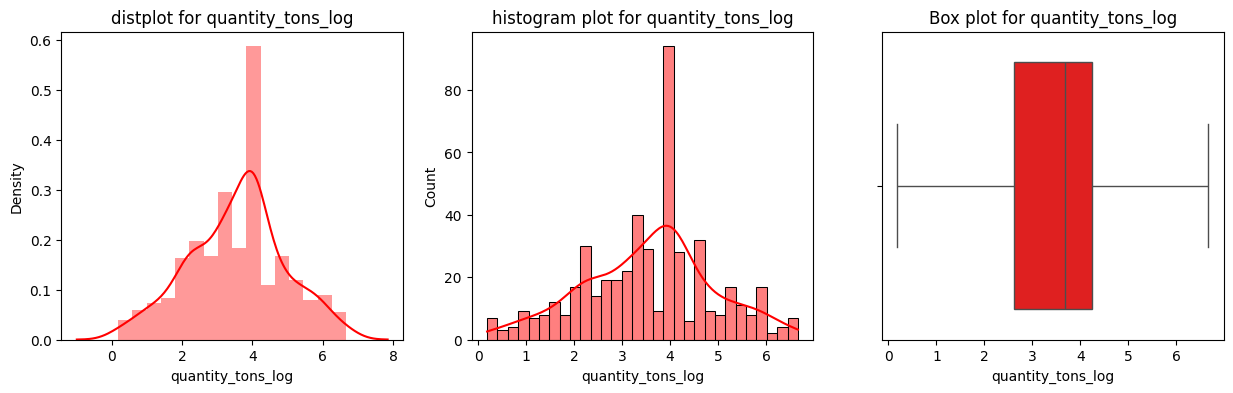

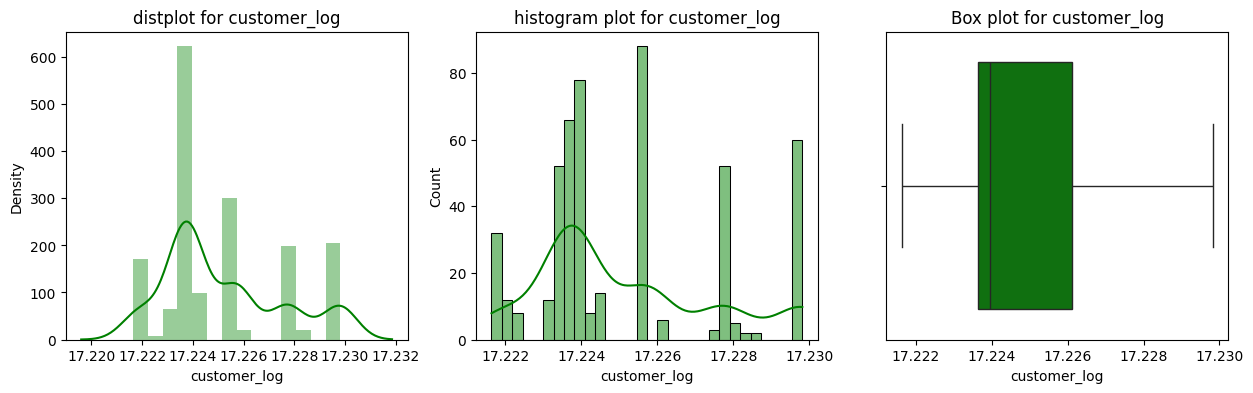

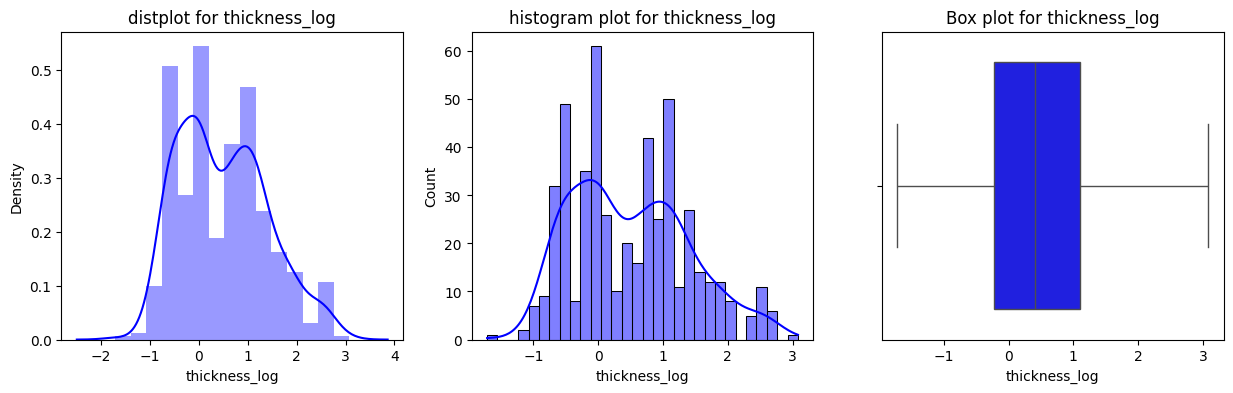

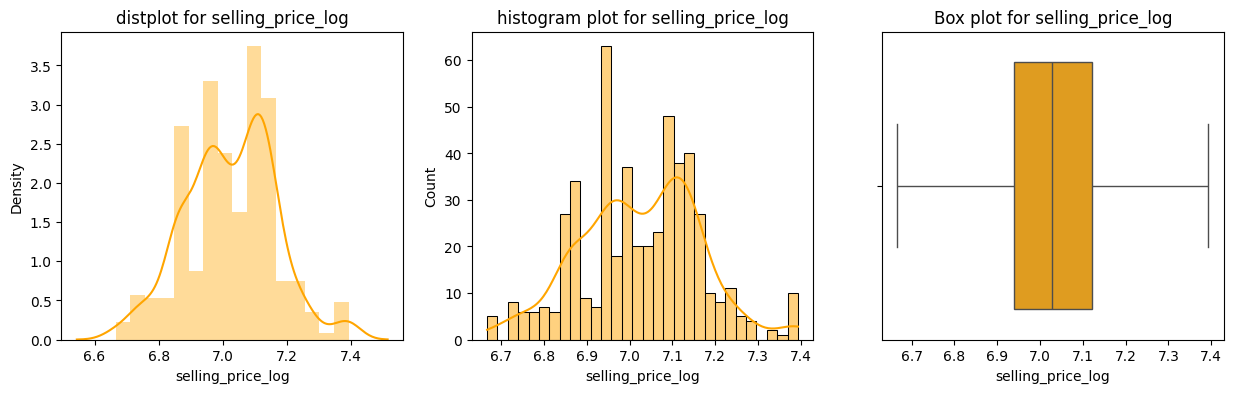

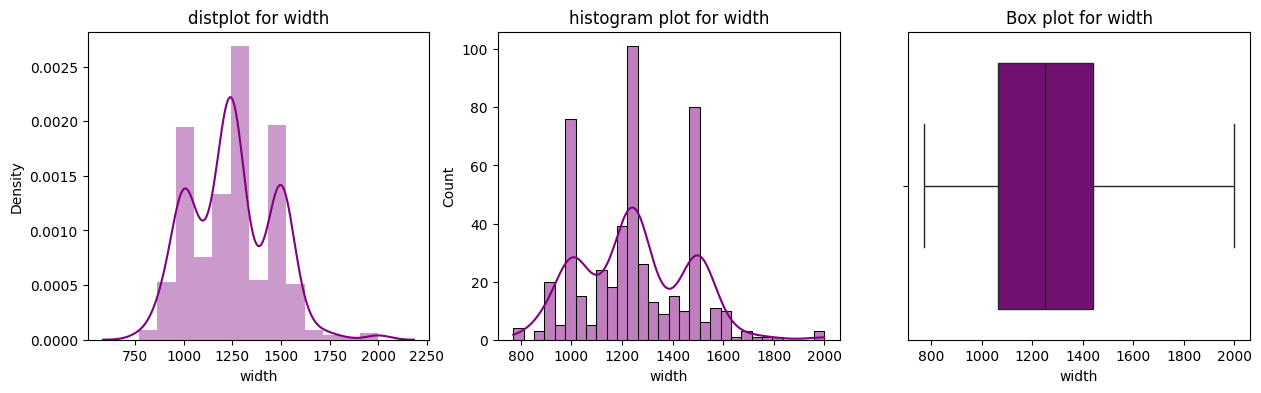

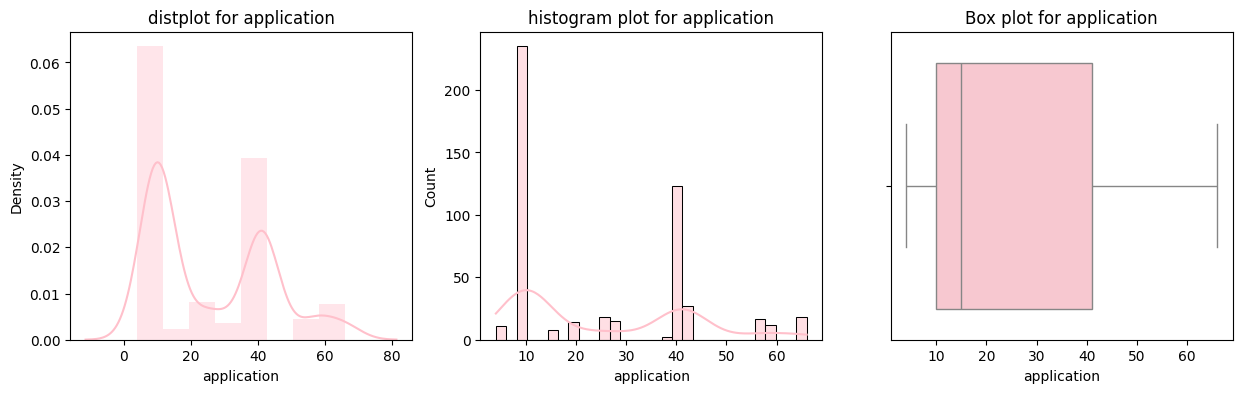

In [48]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']  # or any colors you prefer

for column, color in zip(outlier_columns, colors):#want to plot width and application in this.
    plot(df2, column, color)

In [49]:
#Droping the unwanted skewed columns
#Skewed columns:
# 1.quantity tons
# 2.customer
# 3.thickness
# 4.selling_price

df3= df2.drop(columns=["quantity tons","customer","thickness","selling_price"])

In [50]:
df3.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,1.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,1.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,2.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.666862
3,20210401.0,32.0,1,0.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.666862
4,20210401.0,28.0,1,1.0,10.0,2000.0,640665,20210301.0,2021-04-01,2021-03-01,6.664945,17.223735,1.386294,6.666862


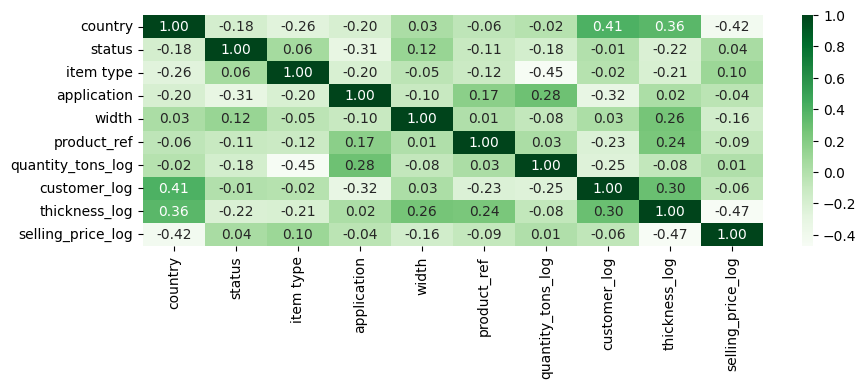

In [51]:
#Checking the correlation with using the heatmap

corr= df3.drop(columns=["item_date","delivery date","item_date_1","delivery_date_1"]).corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr, annot= True, fmt="0.2f" , cmap="Greens")
plt.show()

###### the high correlations are "-0.42", "0.40", "-0.32", "-0.20","0.23"

# **Wrong delivery date handling using ML prediction**

In [52]:
df4= df3.copy()

In [53]:
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,1.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,1.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,2.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.666862
3,20210401.0,32.0,1,0.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.666862
4,20210401.0,28.0,1,1.0,10.0,2000.0,640665,20210301.0,2021-04-01,2021-03-01,6.664945,17.223735,1.386294,6.666862


In [54]:
df4.dtypes

item_date            float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery_date_1       object
quantity_tons_log    float64
customer_log         float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [55]:
#converting the datatype (object to datetime format)
df4["delivery_date_1"]= pd.to_datetime(df4["delivery_date_1"])
df4["item_date_1"]= pd.to_datetime(df4["item_date_1"])

In [56]:
#identifying the difference of the "delivery date" and the "item date"
df4["date_differ"]= (df4["delivery_date_1"]-df4["item_date_1"]).dt.days

In [57]:
df4["date_differ"]

0      91
1       0
2     -90
3     -90
4     -31
       ..
495    91
496    91
497    91
498    91
499    91
Name: date_differ, Length: 500, dtype: int64

In [58]:
# some values have a negative values
# it's mean the "delivery date provides , the previous date then the "item date"
# so this is not possible , so we want to predic the delivery date for the some datas

In [59]:
#creating the another 3 columns using the "item_date_1"
# it is usefull for the delivery date prediction
df4["item_date_day"]= df4["item_date_1"].dt.day
df4["item_date_month"]= df4["item_date_1"].dt.month
df4["item_date_year"]= df4["item_date_1"].dt.year

In [60]:
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,28.0,1,1.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,1.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30.0,1,2.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.666862,-90,1,4,2021
3,20210401.0,32.0,1,0.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.666862,-90,1,4,2021
4,20210401.0,28.0,1,1.0,10.0,2000.0,640665,20210301.0,2021-04-01,2021-03-01,6.664945,17.223735,1.386294,6.666862,-31,1,4,2021


In [61]:
#separating the posive values(pv) dataframe and negative values(nv) dataframe based on the "date_differ" column
df4_pv= df4[df4["date_differ"]>=0]
df4_pv.reset_index(drop= True, inplace= True)

In [62]:
df4_pv.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
486,20210401.0,78.0,1,1.0,10.0,1000.0,1670798778,20210701.0,2021-04-01,2021-07-01,2.340649,17.227659,1.098612,6.873164,91,1,4,2021
487,20210401.0,78.0,1,1.0,10.0,1000.0,1670798778,20210701.0,2021-04-01,2021-07-01,0.925515,17.227659,1.386294,6.861711,91,1,4,2021
488,20210401.0,78.0,1,1.0,10.0,1000.0,1670798778,20210701.0,2021-04-01,2021-07-01,1.040361,17.227659,1.609438,6.864848,91,1,4,2021
489,20210401.0,78.0,1,1.0,10.0,1000.0,1670798778,20210701.0,2021-04-01,2021-07-01,1.151106,17.227659,1.791759,6.859615,91,1,4,2021
490,20210401.0,78.0,1,1.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,0.958258,17.227659,0.916291,6.864848,91,1,4,2021


In [63]:
df4_nv= df4[df4["date_differ"]<0]
df4_nv.reset_index(drop= True, inplace= True)

In [64]:
df4_nv.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
4,20210401.0,32.0,1,1.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,17.22805,-0.597837,6.860664,-90,1,4,2021
5,20210401.0,32.0,1,0.0,41.0,1056.0,611993,20210101.0,2021-04-01,2021-01-01,3.564176,17.22762,-0.994252,6.935370,-90,1,4,2021
6,20210401.0,32.0,1,0.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,3.981195,17.22762,-0.597837,6.909753,-90,1,4,2021
7,20210401.0,32.0,1,0.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,3.983967,17.22762,-0.597837,6.867974,-90,1,4,2021
8,20210401.0,25.0,1,0.0,15.0,1500.0,1671863738,20210301.0,2021-04-01,2021-03-01,3.162847,17.22976,1.386294,6.821107,-31,1,4,2021


In [65]:
# now we want to create the model for delivery date prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [66]:
df4_pv.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year'],
      dtype='object')

In [67]:
#Find the best algorithm for the "delivery date" prediction

def accuracy_date_prediction(df, algorithm):
  x= df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])
  y= df["date_differ"]

  #teain test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train,y_train)
  y_pred= model.predict(x_test)

  #checking the accuracy score
  mse= mean_squared_error(y_test, y_pred)
  rmse= np.sqrt(mse)
  mae= mean_absolute_error(y_test,y_pred)
  r2= r2_score(y_test, y_pred)

  metrics={"R2_score":r2,
           "Mean_squared_error":mse,
           "Root_mean_squared_error":rmse,
           "Mean_absolute_error":mae,
           }
  return metrics


In [68]:
print(accuracy_date_prediction(df4_pv,DecisionTreeRegressor))
print(accuracy_date_prediction(df4_pv,RandomForestRegressor))
print(accuracy_date_prediction(df4_pv,ExtraTreesRegressor))
print(accuracy_date_prediction(df4_pv,GradientBoostingRegressor))
print(accuracy_date_prediction(df4_pv,AdaBoostRegressor))
print(accuracy_date_prediction(df4_pv,XGBRegressor))

{'R2_score': 1.0, 'Mean_squared_error': 0.0, 'Root_mean_squared_error': 0.0, 'Mean_absolute_error': 0.0}
{'R2_score': 0.9999644784128445, 'Mean_squared_error': 0.062064646464646794, 'Root_mean_squared_error': 0.24912777136370565, 'Mean_absolute_error': 0.030505050505050608}
{'R2_score': 0.9970372201713154, 'Mean_squared_error': 5.176679797979795, 'Root_mean_squared_error': 2.2752318119215444, 'Mean_absolute_error': 0.6687878787878788}
{'R2_score': 0.9999999984131732, 'Mean_squared_error': 2.772563146637109e-06, 'Root_mean_squared_error': 0.0016651015424403127, 'Mean_absolute_error': 0.001125370576790888}
{'R2_score': 0.9999679133131913, 'Mean_squared_error': 0.056063060028349564, 'Root_mean_squared_error': 0.23677639246417614, 'Mean_absolute_error': 0.07803110469777037}
{'R2_score': 0.9999999999981326, 'Mean_squared_error': 3.262714642127623e-09, 'Root_mean_squared_error': 5.712017718921767e-05, 'Mean_absolute_error': 3.5487252376936e-05}


# Random Forest algorithm is low bias and reduce overfitting compared to others.

In [69]:
# Model for the RandomForest

def RandomForest(train_df, test_df):

  x= train_df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])
  y= train_df["date_differ"]

  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= RandomForestRegressor().fit(x_train, y_train)

  data= test_df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])

  y_pred=model.predict(data)

  return y_pred

In [70]:
date_difference= RandomForest(df4_pv,df4_nv)

In [71]:
date_difference

array([0. , 6.6, 2.4, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3])

In [72]:
# changing the "date_differ" datatype float into int
date_difference_1= []
for i in date_difference:
  dd= int(round(i,0))
  date_difference_1.append(dd)


In [73]:
df4_nv["date_differ"]= pd.DataFrame(date_difference_1)

In [74]:
df4_nv.isnull().sum()

item_date            0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
item_date_1          0
delivery_date_1      0
quantity_tons_log    0
customer_log         0
thickness_log        0
selling_price_log    0
date_differ          0
item_date_day        0
item_date_month      0
item_date_year       0
dtype: int64

In [75]:
#find the delivery date using "item_date_1" and "date_differ"

def find_delivery_date(item_date, date_differ):
  date= item_date + pd.to_timedelta(date_differ,unit= "D")
  return date

In [76]:
df4_nv["delivery_date_1"]= find_delivery_date(df4_nv["item_date_1"],df4_nv["date_differ"])

In [77]:
# Concadinating the two dataframes(df4_pv,df4_nv) based on the rows
df_final=pd.concat([df4_pv,df4_nv],axis=0,ignore_index=True)

In [78]:
df_final.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
495,20210401.0,32.0,1,1.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-07,4.736160,17.22805,-0.597837,6.860664,6,1,4,2021
496,20210401.0,32.0,1,0.0,41.0,1056.0,611993,20210101.0,2021-04-01,2021-04-07,3.564176,17.22762,-0.994252,6.935370,6,1,4,2021
497,20210401.0,32.0,1,0.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-07,3.981195,17.22762,-0.597837,6.909753,6,1,4,2021
498,20210401.0,32.0,1,0.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-07,3.983967,17.22762,-0.597837,6.867974,6,1,4,2021
499,20210401.0,25.0,1,0.0,15.0,1500.0,1671863738,20210301.0,2021-04-01,2021-04-07,3.162847,17.22976,1.386294,6.821107,6,1,4,2021


In [79]:
# Now we create the three new columns using the "delivery_date_1"
df_final['delivery_date_day']= df_final["delivery_date_1"].dt.day
df_final['delivery_date_month']= df_final["delivery_date_1"].dt.month
df_final['delivery_date_year']= df_final["delivery_date_1"].dt.year

In [80]:
df_final.head(2)

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,...,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,20210401.0,28.0,1,1.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,...,17.221905,0.693147,6.749931,91,1,4,2021,1,7,2021
1,20210401.0,25.0,1,1.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,...,17.223450,-0.223144,6.953684,0,1,4,2021,1,4,2021


In [81]:
df_final.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [82]:
# Droping the unwanted columns
df_final.drop(columns=["item_date","delivery date","item_date_1","delivery_date_1","date_differ"],inplace=True)

In [83]:
df_final.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [84]:
# Saveing the dataframe
df_final.to_csv("Industrial_Copper_Colab.csv",index= False)

In [85]:
import pandas as pd

In [86]:
# Reading the saved "csv" file
df_final= pd.read_csv("Industrial_Copper_Colab.csv")

In [87]:
# This DataFrame don't have any null values and catagorical columns
# so our dataset is ready to the ML prediction

# **Classification Method - Predict (Won/Lose)**

In [88]:
# pip install --upgrade scikit-learn

In [89]:
# pip install -U imbalanced-learn

In [90]:
#packages
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

import pickle

In [91]:
df_class= df_final.copy()

In [92]:
# filter the status column only want to be a (won& loss)
df_c= df_class[(df_class["status"] == 1) | (df_class["status"] == 0)]

In [93]:
df_c.tail()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
495,32.0,1,1.0,41.0,1220.0,611993,4.736160,17.22805,-0.597837,6.860664,1,4,2021,7,4,2021
496,32.0,1,0.0,41.0,1056.0,611993,3.564176,17.22762,-0.994252,6.935370,1,4,2021,7,4,2021
497,32.0,1,0.0,41.0,1220.0,611993,3.981195,17.22762,-0.597837,6.909753,1,4,2021,7,4,2021
498,32.0,1,0.0,41.0,1220.0,611993,3.983967,17.22762,-0.597837,6.867974,1,4,2021,7,4,2021
499,25.0,1,0.0,15.0,1500.0,1671863738,3.162847,17.22976,1.386294,6.821107,1,4,2021,7,4,2021


In [94]:
df_c["status"].value_counts()

status
1    355
0     74
Name: count, dtype: int64

In [95]:
# This is a imbalanced data
# so we want to resampling the data by usin the "SMOTETomek"

In [96]:
df_c.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [97]:
x= df_c.drop(columns=["status"],axis=1)
y= df_c["status"]

In [98]:
x.shape,y.shape

((429, 15), (429,))

In [99]:
x_new,y_new= SMOTETomek().fit_resample(x,y)

In [100]:
x_new.shape,y_new.shape

((700, 15), (700,))

In [101]:
y_new.value_counts()

status
1    350
0    350
Name: count, dtype: int64

In [102]:
# now the data is balanced
# so, we continue the ML prediction

In [103]:
# find the best algorithm for the classification prediction

def accuracy_checking(x_data, y_data, algorithm):
  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  #checking the accuracy_score
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)

  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
  return metrics



In [104]:
print(accuracy_checking(x,y,DecisionTreeClassifier))
print(accuracy_checking(x,y,RandomForestClassifier))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,AdaBoostClassifier))
print(accuracy_checking(x,y,GradientBoostingClassifier))
print(accuracy_checking(x,y,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9767441860465116}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9767441860465116}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9767441860465116}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9651162790697675}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9767441860465116}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9767441860465116}


In [105]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9714285714285714}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 1.0}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 1.0}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9928571428571429}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9857142857142858}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 1.0}


In [106]:
# we got good accuracy after oversampling
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# so we want the reduce the overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

In [107]:
# Get the high accuracy using Hyperparameter Tuning method with using of the GridsearchCV

x_train, x_test, y_train, y_test= train_test_split(x_new,y_new, test_size= 0.2, random_state=42)

parameters= {"max_depth": [2,5,10,20],
             "min_samples_split": [2,5,10],
             "min_samples_leaf": [1,2,4],
             "max_features": ['sqrt', 'log2', None]}

gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= -1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [108]:
gridsearch.cv_results_

{'mean_fit_time': array([0.36298585, 0.35209746, 0.35025225, 0.34238992, 0.34813218,
        0.34646935, 0.34877181, 0.34613347, 0.34177799, 0.3475863 ,
        0.34356132, 0.34433284, 0.34667034, 0.35020308, 0.34762373,
        0.34183679, 0.35447583, 0.3364717 , 0.39920859, 0.38594446,
        0.39667683, 0.39604206, 0.39667645, 0.39910932, 0.39180279,
        0.3943645 , 0.40803738, 0.36136513, 0.36469831, 0.38965712,
        0.37914896, 0.37415328, 0.35607991, 0.36438718, 0.35262666,
        0.36433735, 0.36925869, 0.36042585, 0.37164583, 0.39122162,
        0.40379486, 0.39733486, 0.40464191, 0.45038695, 0.44179897,
        0.56658802, 0.57668757, 0.56132021, 0.51996326, 0.52149782,
        0.5360178 , 0.57158566, 0.54564342, 0.52867846, 0.4737442 ,
        0.42175865, 0.47826376, 0.44814963, 0.48641868, 0.43698049,
        0.44132662, 0.46409979, 0.42262816, 0.45939436, 0.49389882,
        0.49474201, 0.49067354, 0.47585254, 0.48510885, 0.48277817,
        0.44045515, 0.4478189 ,

In [109]:
gridsearch.best_score_

0.9928571428571429

In [110]:
gridsearch.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [111]:
# Passing the best Hypertuning paramers in the ,
# RandomForest algorithm and check the accuracy for training and testing

In [112]:
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model= RandomForestClassifier(max_depth=20, max_features= None, min_samples_leaf=1, min_samples_split=2).fit(x_train,y_train)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

#checking the accuracy_score for train and test

accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")
#confution matrics and the classification report for test

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))



Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  1.0
Accuracy_Test:  0.9857142857142858
  
Confution_matrix for Test
--------------------------
[[67  0]
 [ 2 71]]
 
Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.97      0.99        73

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



In [113]:
# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data

In [114]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold= roc_curve(y_true= y_test, y_score=y_pred_test)
print(threshold)
print(FP)
print(TP)
print(" ")
auc_curve= auc(x=FP,y=TP)
print("auc_curve:",auc_curve)

[inf  1.  0.]
[0. 0. 1.]
[0.         0.97260274 1.        ]
 
auc_curve: 0.9863013698630136


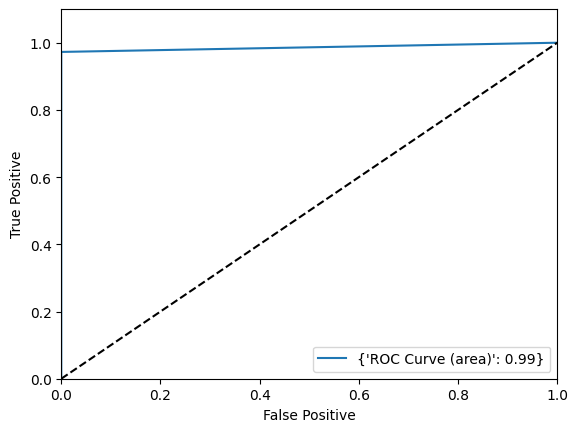

In [115]:
# create a plot for roc and auc curve
roc_point= {"ROC Curve (area)":round(auc_curve,2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()

In [116]:
user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_pred_user= model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Won


In [117]:
#saving the model using the pickle

with open("Classification_model.pkl","wb") as f:
    pickle.dump(model,f)

In [118]:
with open("Classification_model.pkl","rb") as f1:
  class_model= pickle.load(f1)

In [119]:
user_data = np.array([[77.0,3.0,10.0,1500.0,164141591,3.677655,17.222226,0.000000,7.110696,1,4,2021,1,8,2021]])
y_pred_user= class_model.predict(user_data)

if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Lose


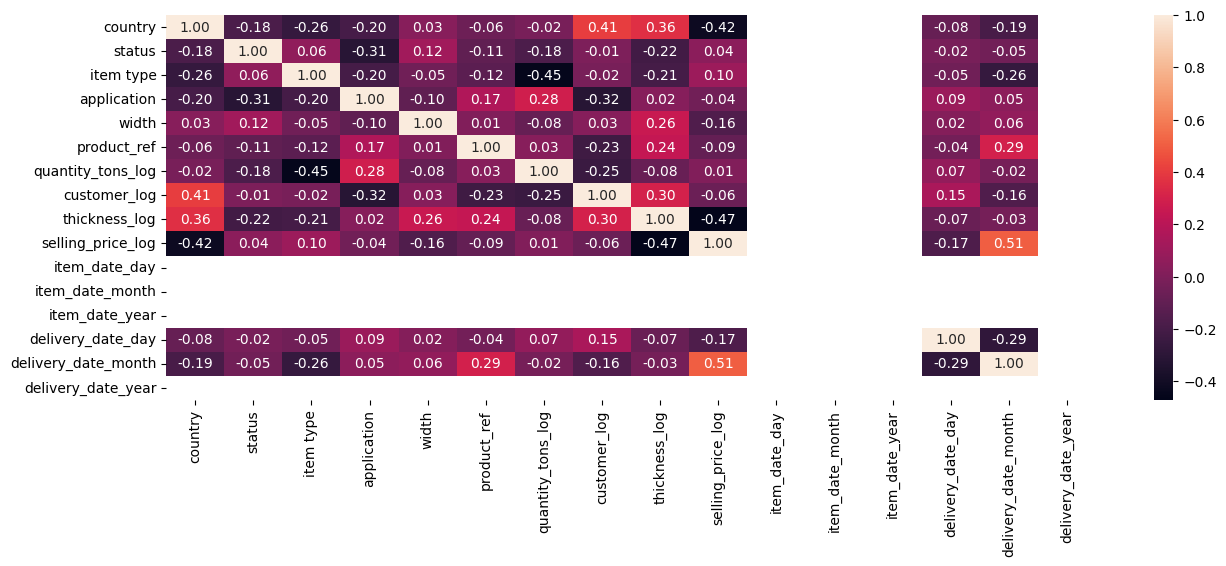

In [138]:
corr= df_final.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot= True, fmt="0.2f")
plt.show()

# **Regression Method - Predict the Selling Price**

In [121]:
#packages

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [122]:
df_regg= df_final.copy()

In [123]:
#Find the best ML model to predict the selling price

def accuracy_regressor(df,algorithm):

  x= df.drop(columns=["selling_price_log"], axis=1)
  y= df["selling_price_log"]

  #train test splitting
  x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  r2_train= r2_score(y_train, y_pred_train)
  r2_test= r2_score(y_test, y_pred_test)

  metrics={"Algorithm":algorithm.__name__,
           "R2_Train": r2_train,
           "R2_Test": r2_test}

  return metrics

In [124]:
print(accuracy_regressor(df_regg, DecisionTreeRegressor))
print(accuracy_regressor(df_regg, RandomForestRegressor))
print(accuracy_regressor(df_regg, ExtraTreesRegressor))
print(accuracy_regressor(df_regg, AdaBoostRegressor))
print(accuracy_regressor(df_regg, GradientBoostingRegressor))
print(accuracy_regressor(df_regg, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_Train': 1.0, 'R2_Test': 0.7421792028164553}
{'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.9784401915602571, 'R2_Test': 0.761602893507731}
{'Algorithm': 'ExtraTreesRegressor', 'R2_Train': 1.0, 'R2_Test': 0.7549500125365641}
{'Algorithm': 'AdaBoostRegressor', 'R2_Train': 0.7894971078016461, 'R2_Test': 0.7143338979975381}
{'Algorithm': 'GradientBoostingRegressor', 'R2_Train': 0.9616247141614322, 'R2_Test': 0.7867805501301764}
{'Algorithm': 'XGBRegressor', 'R2_Train': 0.9997062837073736, 'R2_Test': 0.7521486576792741}


In [125]:
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

In [126]:
x= df_regg.drop(columns=["selling_price_log"], axis=1)
y= df_regg["selling_price_log"]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

parameters_r= {"max_depth": [2,4,10,20],
               "min_samples_split": [2,5,10],
               "min_samples_leaf": [1,2,4],
               "max_features": ["sqrt","log2",None]}

gridsearch_r= GridSearchCV(estimator= RandomForestRegressor(), param_grid= parameters_r, cv= 5,n_jobs=-1)
gridsearch_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [127]:
gridsearch_r.cv_results_

{'mean_fit_time': array([0.32263551, 0.31268864, 0.32884474, 0.35432501, 0.35905638,
        0.3469522 , 0.32957382, 0.30591598, 0.3125504 , 0.30026808,
        0.2914762 , 0.29054465, 0.28375683, 0.28370676, 0.29651012,
        0.35208936, 0.36290283, 0.3190516 , 0.34935298, 0.3387435 ,
        0.34039369, 0.34917059, 0.37264047, 0.50959816, 0.34008842,
        0.38886886, 0.42385492, 0.33463349, 0.31445956, 0.30833721,
        0.30158415, 0.32282119, 0.32160206, 0.31914945, 0.34661183,
        0.36503701, 0.37772579, 0.32126527, 0.30391817, 0.3112771 ,
        0.30755224, 0.2987195 , 0.30250249, 0.29668317, 0.29553003,
        0.35222573, 0.43427215, 0.48267384, 0.41973343, 0.42269626,
        0.45714846, 0.39659252, 0.37239513, 0.35076413, 0.36232219,
        0.34158931, 0.33415742, 0.34393339, 0.32547112, 0.31336946,
        0.32894406, 0.33994651, 0.32167816, 0.36262493, 0.35582895,
        0.39452457, 0.38060093, 0.35044761, 0.34262099, 0.33111567,
        0.32733316, 0.35293651,

In [128]:
gridsearch_r.best_score_

0.8515411875893522

In [129]:
gridsearch_r.best_params_

{'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [130]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x = df_regg.drop(columns=['selling_price_log'], axis=1)
y = df_regg['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model_r.predict(x_train)
y_pred_test = model_r.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test


(0.9806677449892116, 0.7574397282466392)

In [131]:
#predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = df_regg.drop(columns=['selling_price_log'], axis=1)
y = df_regg['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model_r.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.7279594344907188,
 'Mean Absolute Error': 0.044638331765732835,
 'Mean Squared Error': 0.006219766323013981,
 'Root Mean Squared Error': 0.07886549513579422}

In [132]:
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model_r.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))


Predicted selling price with Log:  7.014482096549435
Predicted selling price without Log:  1112.6302619168541


In [133]:
import pickle

In [134]:
with open("Regression_Model.pkl","wb") as r:
  pickle.dump(model_r,r)

In [135]:
with open("Regression_Model.pkl","rb") as r1:
  regg_model=pickle.load(r1)

In [136]:
df_final.head()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,28.0,1,1.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,1.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,1.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,30.0,2,1.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,6.666862,1,4,2021,1,7,2021
4,38.0,1,0.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021


In [137]:
user_data = np.array([[28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,1,4,2021,1,7,2021]])
y_pred = regg_model.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  6.908193050712181
Predicted selling price without Log:  1000.437867566072
